YOLO, which stands for "You Only Look Once," is a family of object detection models known for their speed and efficiency. Unlike two-stage detectors like Faster R-CNN, YOLO models are single-stage detectors, meaning they predict bounding boxes and class probabilities directly from the input image in a single pass through the network. YOLO’s architecture is based on a convolutional neural network (CNN) backbone, often pre-trained on a large dataset like ImageNet, to extract spatial features from the input image. The model divides the image into a grid, where each cell predicts bounding boxes, confidence scores, and class probabilities. By framing object detection as a single regression problem, YOLO reduces detection complexity and achieves impressive speed, making it popular for real-time applications like video analysis or live camera feeds.

A practical distinction with YOLO is that it requires all input images to be resized to the same dimensions before processing, as it divides each image into a fixed grid for predictions. This resizing can impact detection performance, especially if it distorts small objects or affects aspect ratios. Additionally, YOLO uses a specific annotation format, where each bounding box is represented by the class, normalized center coordinates, width, and height. This format differs from Faster R-CNN’s XML-based annotations and may require conversion steps when working with datasets in different formats.

The distinction between one-stage and two-stage detectors like Faster R-CNN and YOLO is central to understanding their respective strengths and trade-offs. In two-stage detectors, the first stage generates region proposals, and the second stage classifies these regions, which often yields higher accuracy, especially in complex scenes with small or densely packed objects. However, the multi-step nature of two-stage detectors generally makes them slower and more computationally intensive, which can be a drawback in scenarios that demand quick processing. 

In contrast, one-stage detectors like YOLO combine region proposal and classification into a single step, making them faster and more efficient, especially for simpler detection tasks or larger objects. This speed advantage comes at the expense of slight reductions in accuracy, as YOLO may struggle with detecting smaller or closely packed objects due to its grid-based approach. Despite these trade-offs, YOLO remains an excellent choice when inference speed is a priority, offering a practical balance between performance and computational efficiency.

### Step-by-Step Guide for Using YOLO

1. **Install the `ultralytics` Package**  
   First, ensure the `ultralytics` package is installed to access YOLO’s Python API.


In [2]:

# Install the ultralytics package (which includes YOLOv5)
%pip install ultralytics

   ---------------------------------------- 0.0/896.9 kB ? eta -:--:--
   ----------------------- ---------------- 524.3/896.9 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 896.9/896.9 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


2. **Import Libraries and Set Up Paths**

In [1]:
import os
from pathlib import Path

MODELS_PATH = Path(os.getenv('MODELS_PATH'))
DATA_PATH = Path(os.getenv('DATA_PATH'))
TORCH_HOME = Path(os.getenv('TORCH_HOME'))

print(f'{MODELS_PATH=}')
print(f'{DATA_PATH=}')
print(f'{TORCH_HOME=}')

from ultralytics import YOLO
import yaml



MODELS_PATH=WindowsPath('C:/Users/bagge/My Drive/Python_Projects/DS776_Develop_Project/models')
DATA_PATH=WindowsPath('C:/Users/bagge/My Drive/Python_Projects/DS776_Develop_Project/data')
TORCH_HOME=WindowsPath('C:/Users/bagge/My Drive/Python_Projects/DS776_Develop_Project/downloads')


3. **Prepare the Data Configuration**  
   Create a YAML configuration file specifying the data path and classes.  

In [2]:
import yaml

# Set up the dataset path
# dataset_dir = os.path.abspath('../../data/PennFudanPed')
dataset_dir = DATA_PATH / 'PennFudanPedYOLO'
yaml_path = dataset_dir / 'penn_fudan.yaml'

# Set up paths for your actual dataset structure
dataset_yaml = {
    'path': str(dataset_dir),                   # Root directory of the dataset
    'train': 'train/images',            # Path to the training images
    'val': 'val/images',                # Path to the validation images
    'nc': 1,                               # Number of classes
    'names': ['pedestrian']                # Class names
}

# Save the configuration
with open(yaml_path, "w") as file:
    yaml.dump(dataset_yaml, file)

print(f'Dataset YAML configuration saved at {yaml_path}')


Dataset YAML configuration saved at C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\data\PennFudanPedYOLO\penn_fudan.yaml


Notice that we're using the same folder for training and validation data.  By default, the `ultralytics` package uses 80% of the data for training and 20% for validation if no explicit split is provided.  If you want to control the data splitting in some other way you can create `/train` and `/val` folders in the `PNGImages` directory and split the data however you like.  You'll just need to the change folder names to `PNGImages/train` and `PNGImages/val` in the YAML file.

4. **Initialize the Model and Start Training**  
   Load a pre-trained YOLO model and fine-tune it on the Penn Fudan dataset.

In [ ]:
# Load a pre-trained YOLOv5 model (e.g., yolov5su.pt)
model = YOLO('yolo11s.pt')

# specify custom project directory
#custom_project_dir = os.path.abspath('../../models/yolov11')
custom_project_dir = str(MODELS_PATH / 'yolov11')
experiment_name = 'pennfudan640'

yaml_path_str = str(yaml_path)

TypeError: YOLO.__init__() got an unexpected keyword argument 'save_dir'

In [12]:

# Train the model with early stopping (image size must be a multple of 32, e.g. 320 or 640)
results = model.train(data=yaml_path, epochs=20, imgsz=640, batch=8, patience=10,
                      project = custom_project_dir, name = experiment_name)

Ultralytics 8.3.39  Python-3.11.10 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\data\PennFudanPedYOLO\penn_fudan.yaml, epochs=20, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\models\yolov11, name=pennfudan6405, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

train: Scanning C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\data\PennFudanPedYOLO\train\labels.cache... 136 images, 0 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\data\PennFudanPedYOLO\val\labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]


Plotting labels to C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\models\yolov11\pennfudan6405\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\models\yolov11\pennfudan6405
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.46G      1.032      1.574      1.213         49        640: 100%|██████████| 17/17 [00:02<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]

                   all         34         91       0.93      0.857      0.916      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.35G      0.981      1.089      1.173         43        640: 100%|██████████| 17/17 [00:01<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.71it/s]

                   all         34         91       0.87      0.857      0.908      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G     0.9885     0.9684      1.161         38        640: 100%|██████████| 17/17 [00:01<00:00, 15.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.26it/s]

                   all         34         91      0.809      0.745      0.789      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.35G      1.058      1.014      1.213         51        640: 100%|██████████| 17/17 [00:01<00:00, 15.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.31it/s]

                   all         34         91      0.206      0.297      0.122     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.34G      1.131      1.051      1.254         28        640: 100%|██████████| 17/17 [00:01<00:00, 15.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.25it/s]

                   all         34         91       0.19      0.659      0.166     0.0818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.34G      1.101      1.027       1.25         51        640: 100%|██████████| 17/17 [00:01<00:00, 16.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.62it/s]

                   all         34         91      0.646      0.683       0.71      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.34G      1.045     0.9569      1.196         45        640: 100%|██████████| 17/17 [00:01<00:00, 16.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]

                   all         34         91       0.93      0.802      0.892      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.34G      1.038     0.9001      1.202         34        640: 100%|██████████| 17/17 [00:01<00:00, 15.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.81it/s]

                   all         34         91      0.772      0.707      0.758       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.34G      1.034     0.8971      1.197         38        640: 100%|██████████| 17/17 [00:01<00:00, 16.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.13it/s]

                   all         34         91      0.798       0.78      0.806      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.34G     0.9845     0.8225      1.164         44        640: 100%|██████████| 17/17 [00:01<00:00, 16.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.22it/s]

                   all         34         91      0.873      0.834      0.896      0.692


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.34G      0.823     0.7454      1.099         25        640: 100%|██████████| 17/17 [00:01<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.10it/s]

                   all         34         91      0.827      0.786      0.845      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.33G       0.84     0.7029      1.126         21        640: 100%|██████████| 17/17 [00:01<00:00, 16.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.82it/s]

                   all         34         91      0.914      0.817      0.898      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.35G     0.7893     0.6452      1.081         12        640: 100%|██████████| 17/17 [00:01<00:00, 16.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.37it/s]

                   all         34         91      0.942      0.813      0.924      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.34G     0.7321     0.5876      1.045         13        640: 100%|██████████| 17/17 [00:01<00:00, 16.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.24it/s]

                   all         34         91      0.897      0.858      0.941       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.34G     0.7236     0.6053      1.042         27        640: 100%|██████████| 17/17 [00:01<00:00, 16.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.27it/s]

                   all         34         91      0.878      0.901       0.95      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.34G     0.7005     0.5431      1.025         26        640: 100%|██████████| 17/17 [00:01<00:00, 16.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.29it/s]

                   all         34         91      0.895      0.901      0.944      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.34G     0.6467     0.5039     0.9609         21        640: 100%|██████████| 17/17 [00:01<00:00, 16.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.06it/s]

                   all         34         91      0.908      0.863      0.933      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.35G     0.6711     0.4898      1.018         24        640: 100%|██████████| 17/17 [00:01<00:00, 16.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.41it/s]

                   all         34         91      0.914      0.868      0.933      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.34G     0.6526     0.4953      1.031         15        640: 100%|██████████| 17/17 [00:01<00:00, 16.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.95it/s]

                   all         34         91      0.901      0.897      0.951      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.33G     0.5763     0.4477     0.9514         15        640: 100%|██████████| 17/17 [00:01<00:00, 16.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all         34         91      0.893      0.913      0.955      0.787



20 epochs completed in 0.026 hours.
Optimizer stripped from C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\models\yolov11\pennfudan6405\weights\last.pt, 19.2MB
Optimizer stripped from C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\models\yolov11\pennfudan6405\weights\best.pt, 19.2MB

Validating C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\models\yolov11\pennfudan6405\weights\best.pt...
Ultralytics 8.3.39  Python-3.11.10 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.41it/s]


                   all         34         91      0.893      0.913      0.955      0.785
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\models\yolov11\pennfudan6405


In [ ]:
#model_path = "/Users/jbaggett/Library/CloudStorage/GoogleDrive-baggett.jeff@gmail.com/My Drive/Python_Projects/DS776_Develop_Project/models/yolov11/pennfudan/weights/best.pt"
model_path = str(MODELS_PATH / 'yolov11' / 'pennfudan' / 'weights' / 'best.pt')
model = YOLO(model_path)

TypeError: YOLO.__init__() got an unexpected keyword argument 'data'

5. **Evaluate the Model**  
   Evaluate the model on the validation data.

In [17]:
# Evaluate the model on validation data
metrics = model.val(data=yaml_path)
print("Evaluation metrics:", metrics)

Ultralytics 8.3.39  Python-3.11.10 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)


val: Scanning C:\Users\bagge\My Drive\Python_Projects\DS776_Develop_Project\data\PennFudanPedYOLO\val\labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]


                   all         34         91      0.875      0.847      0.922      0.656
Speed: 0.4ms preprocess, 9.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs\detect\val3
Evaluation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002890579CF50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,

6. **Run Inference and Visualize Predictions**  
   After training, test the model on a sample image and visualize the output.


image 1/1 /Users/jbaggett/Library/CloudStorage/GoogleDrive-baggett.jeff@gmail.com/My Drive/Python_Projects/DS776_Develop_Project/data/PennFudanPed/val/images/FudanPed00001.png: 320x320 2 pedestrians, 159.5ms
Speed: 3.5ms preprocess, 159.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)


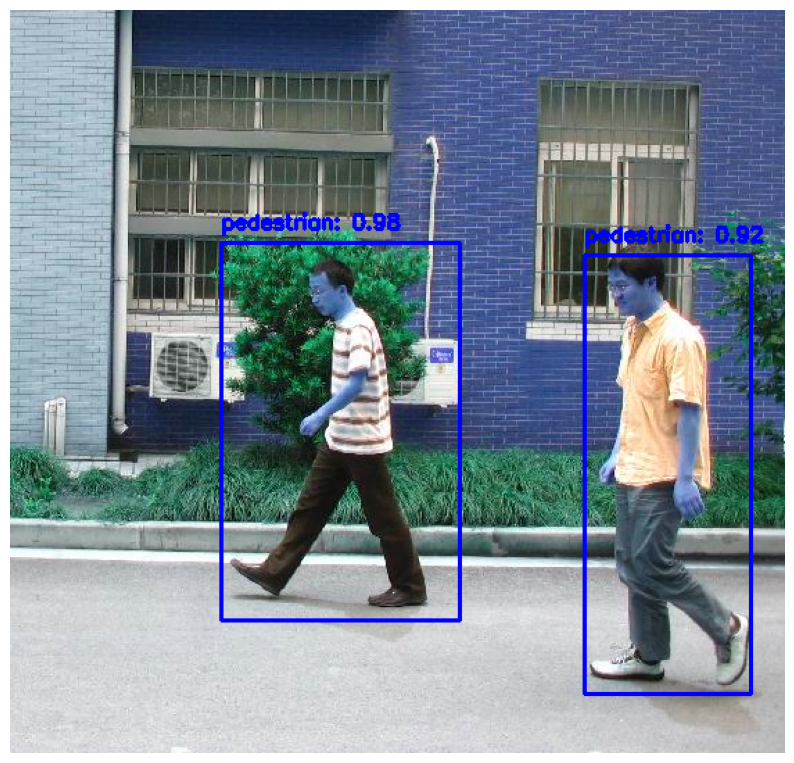

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Define dataset directory and sample image path
dataset_dir = os.path.abspath('../../data/PennFudanPed')
sample_image_path = os.path.join(dataset_dir, 'val', 'images', 'FudanPed00001.png')

# Perform inference on a sample image without saving results
results = model.predict(sample_image_path, save=False)

# Load the original image
image = Image.open(sample_image_path).convert("RGB")
image = np.array(image)

# Iterate over predictions to draw boxes
for result in results:
    boxes = result.boxes.xyxy  # Bounding box coordinates
    scores = result.boxes.conf  # Confidence scores
    classes = result.boxes.cls  # Class IDs

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f"{model.names[int(cls)]}: {score:.2f}"

        # Draw bounding box and label
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Convert image back to RGB for display if using OpenCV functions
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb = image

# Display the image with predicted boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
